# 💤 Should I Sleep or Study?
A regression-based project that predicts whether you should sleep or study before an exam based on your current state and habits.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

## 🔧 Step 1: Generate Synthetic Data

In [2]:
n = 500
df = pd.DataFrame({
    "sleep_hours_last_3_days": np.random.normal(15, 3, n).clip(6, 24),
    "subject_difficulty": np.random.randint(1, 11, n),
    "exam_proximity_days": np.random.randint(0, 15, n),
    "confidence_level": np.random.randint(1, 11, n),
    "past_exam_score": np.random.uniform(40, 100, n),
    "coffee_intake": np.random.randint(0, 6, n),
    "stress_level": np.random.randint(1, 11, n),
    "distraction_index": np.random.uniform(0, 10, n)
})

## 🎯 Step 2: Create Target Variable

In [3]:
df["sleep_study_score"] = (
    0.3 * (20 - df["sleep_hours_last_3_days"]) +
    0.2 * df["subject_difficulty"] +
    0.2 * df["stress_level"] +
    0.1 * df["distraction_index"] +
    0.1 * df["coffee_intake"] -
    0.3 * df["confidence_level"] -
    0.2 * (100 - df["past_exam_score"]) / 10 -
    0.2 * (15 - df["exam_proximity_days"])
)

df["sleep_study_score"] = (df["sleep_study_score"] - df["sleep_study_score"].min()) / (
    df["sleep_study_score"].max() - df["sleep_study_score"].min()
)

## 🤖 Step 3: Train Regression Model

In [4]:
X = df.drop(columns=["sleep_study_score"])
y = df["sleep_study_score"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("MSE:", mse)
print("R² Score:", r2)

MSE: 4.202225064257398e-31
R² Score: 1.0


## 📊 Step 4: Visualize Relationships

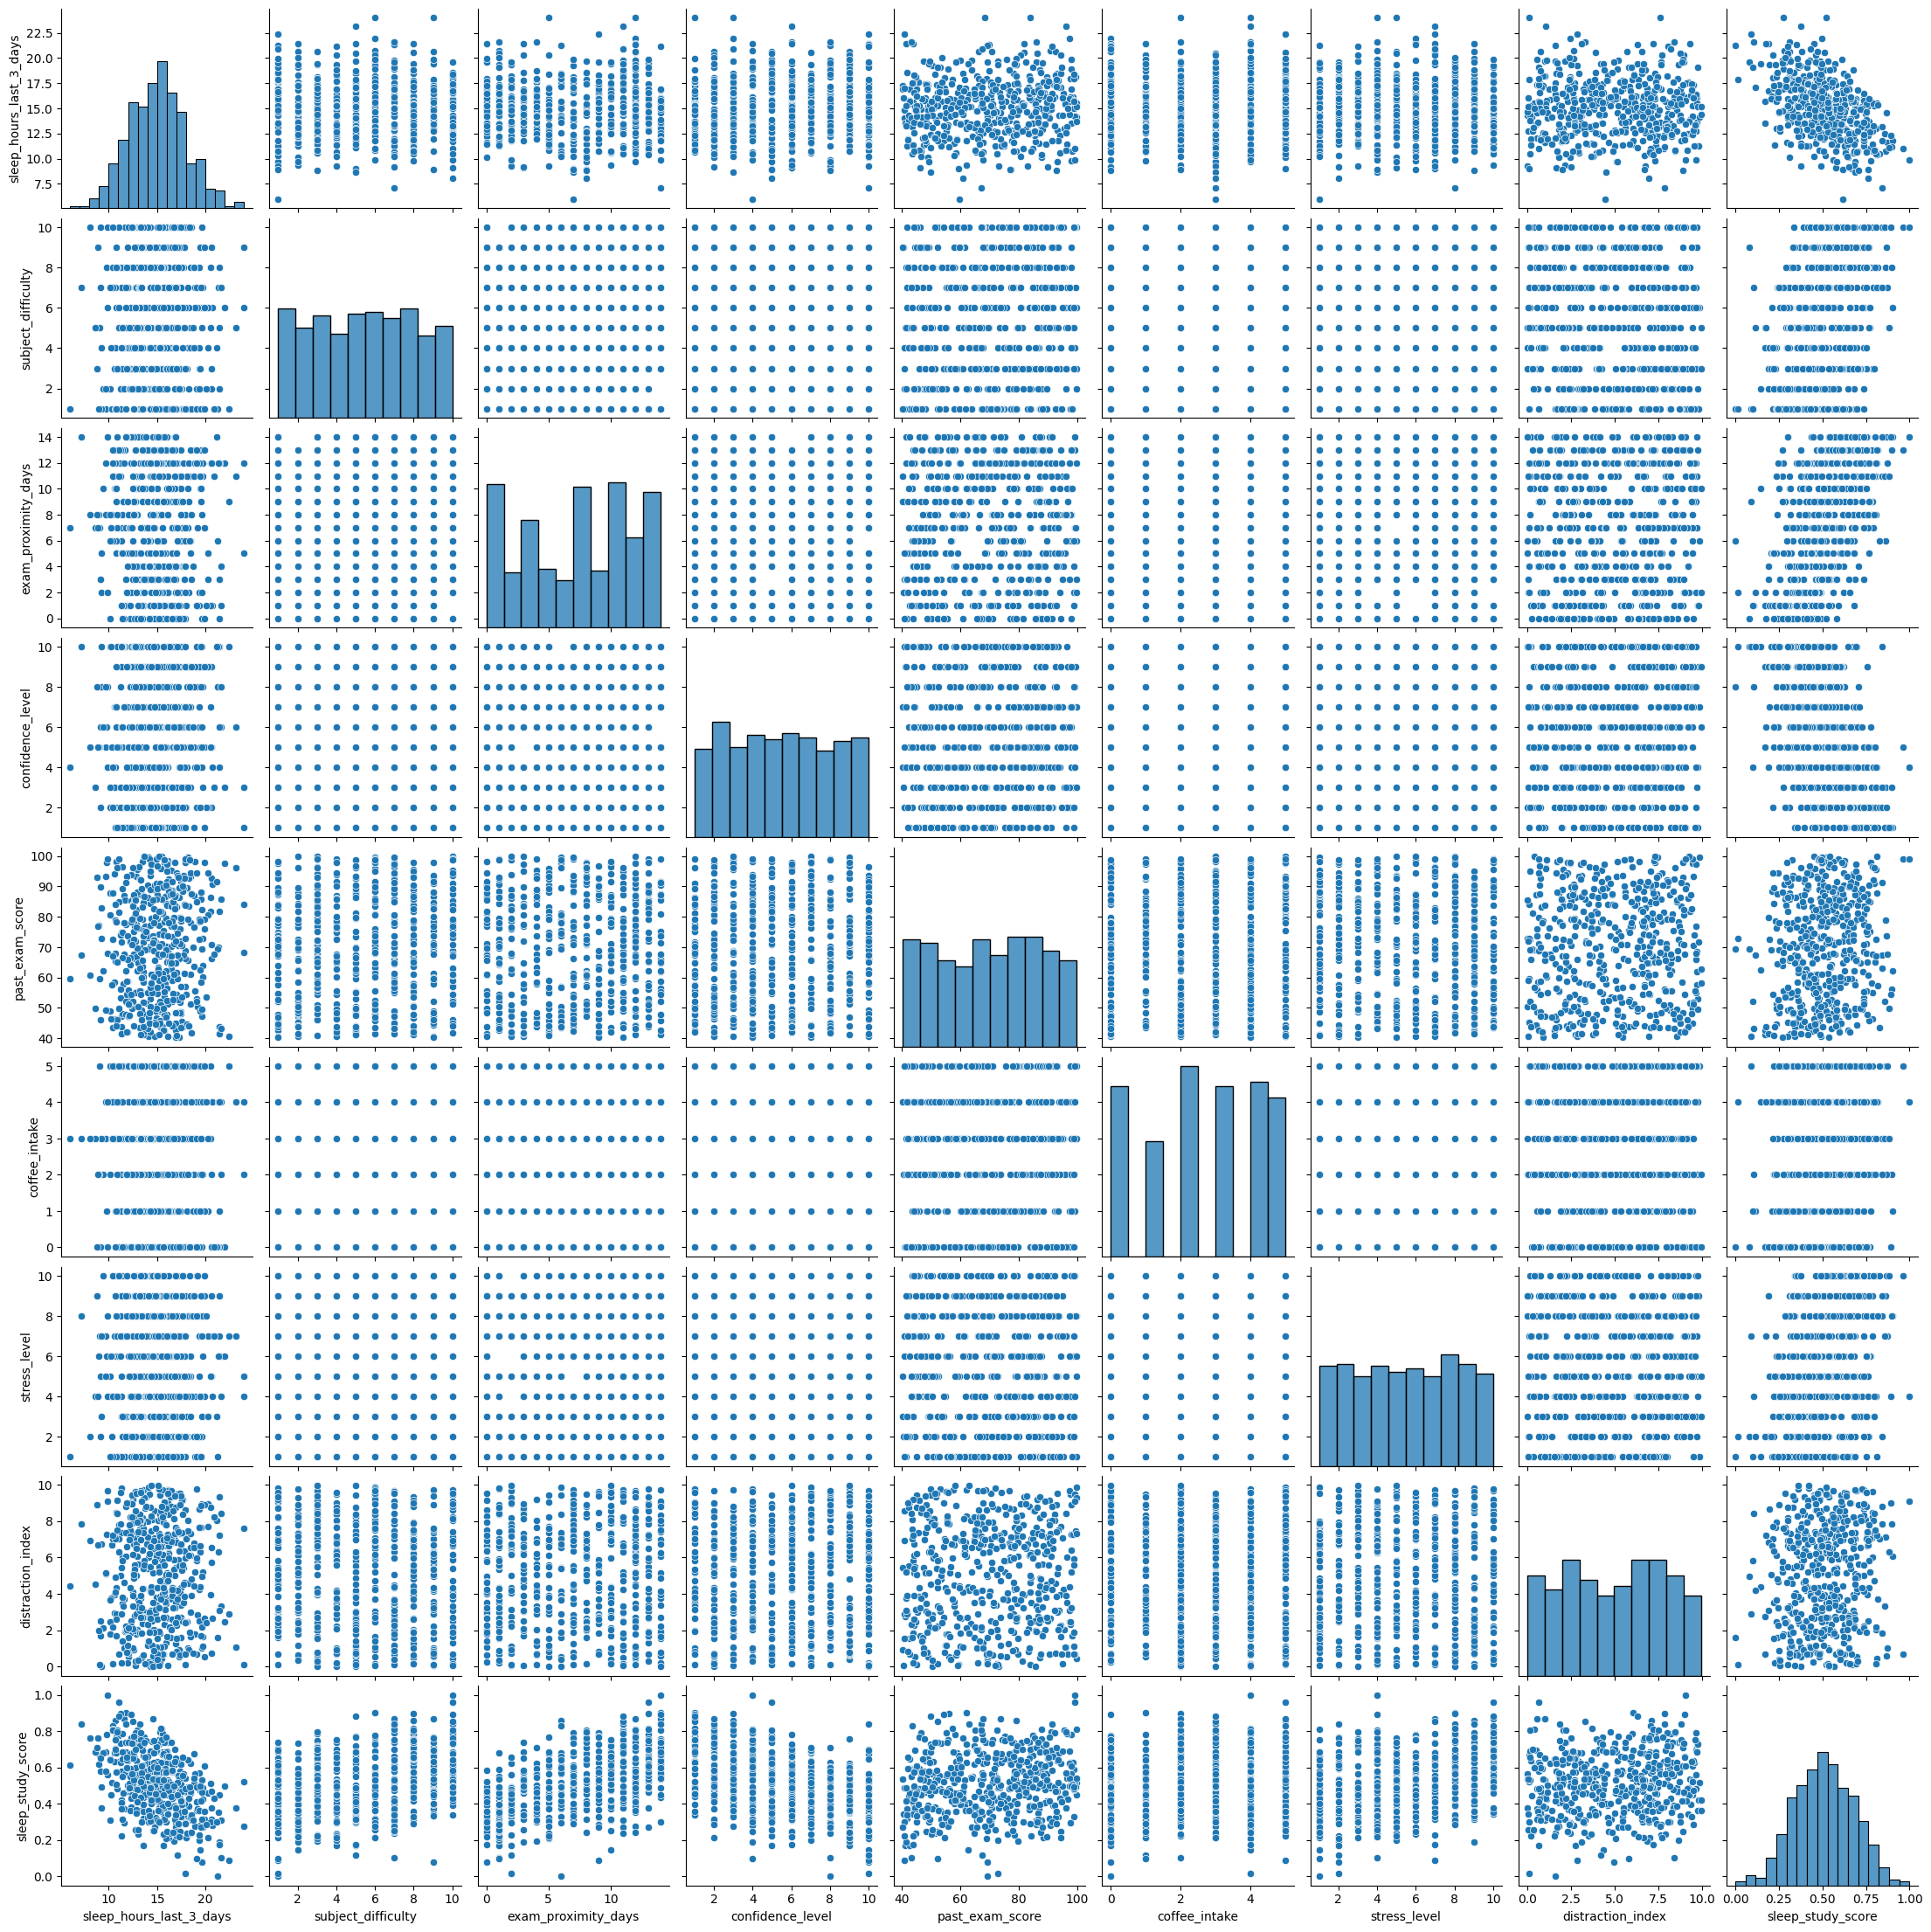

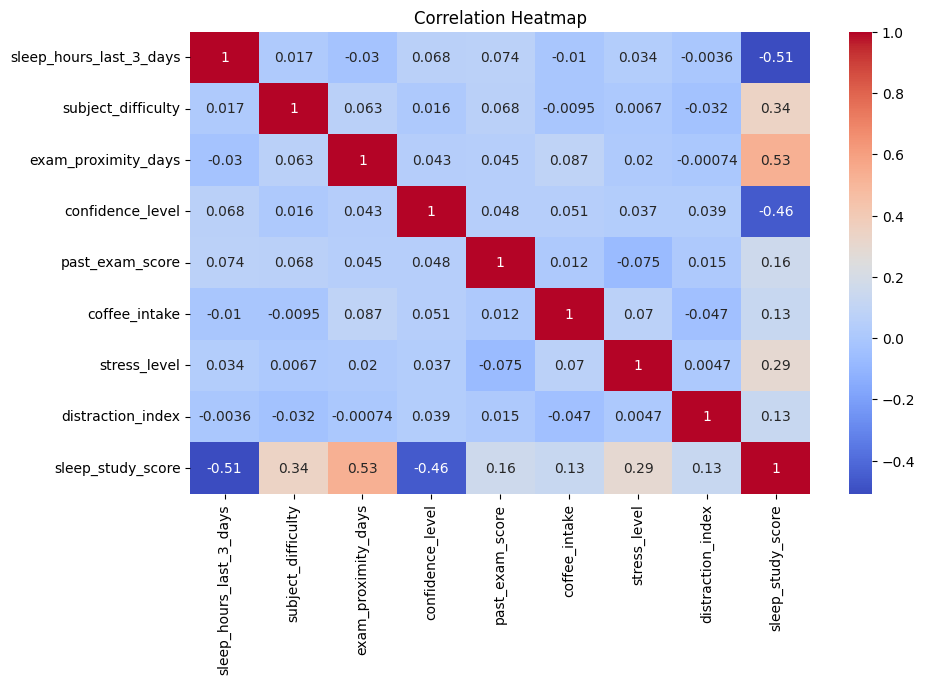

In [5]:
sns.pairplot(df)
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## 💾 Step 5: Save Model

In [6]:
joblib.dump(model, "sleep_study_model.pkl")
df.to_csv("sleep_study_data.csv", index=False)